<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/TiposDeVinho_Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tipos do Vinho - Classificação com Agrupamento**

Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) com 8096 instâncias de dados sobre os tipos de vinho (Red and White). Dados descrevem componentes químicos/biológicos que fazem parte da qualidade de um vinho.

* Aprendizado não supervisionado
* Arranjo de instâncias em grupos com base em similaridade
  * similaridade entre vetores de atributos
* Objetivo do agrupamento é criar grupos coesos
  * maior similaridade entre instâncias de um mesmo grupo
  * maior dissimilaridade entre instâncias em grupos diferentes





In [69]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **1. Importação das bibliotecas**


In [70]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# **2. Lendo dados**


In [71]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/QualidadeVinho/winequality-whiteAndRed.csv')

In [72]:
# verificando o dataframe
dados.head(5)

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [73]:
dados["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [74]:
dados["wine type"].unique()

array(['white', 'red'], dtype=object)

In [75]:
#verificando colunas dos dados
dados.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [76]:
#verificar a quantidade de instâncias
dados.shape

(8096, 13)

# **3. Limpeza e organização dos dados**

In [77]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [78]:
#eliminar colunas irrelevantes para o contexto
dados = dados.drop(columns=['density']) # atributo eliminado pois contém valores muito desproporcionais

In [79]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


In [80]:
#trocando o tipo do atributo 'wine type'  por um tipo numerico
dados['wine type'] = dados['wine type'].replace(['white','red'],[0,1]) # 0 - para white wine | 1 - para red wine
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


# **4. Re-escala dos dados**

**Re-escala usando máximo e mínimo**

In [81]:
dados = (dados - dados.min())/(dados.max()-dados.min())

In [82]:
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.0,0.264463,0.000160,0.216867,0.308282,0.073619,0.152778,0.377880,0.217054,0.129213,0.115942,0.5
1,0.0,0.206612,0.000186,0.204819,0.015337,0.080166,0.045139,0.290323,0.449612,0.151685,0.217391,0.5
2,0.0,0.355372,0.000169,0.240964,0.096626,0.000049,0.100694,0.209677,0.418605,0.123596,0.304348,0.5
3,0.0,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5
4,0.0,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5


# **5. Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [83]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.264463,0.000160,0.216867,0.308282,0.073619,0.152778,0.377880,0.217054,0.129213,0.115942,0.5
1,0.206612,0.000186,0.204819,0.015337,0.080166,0.045139,0.290323,0.449612,0.151685,0.217391,0.5
2,0.355372,0.000169,0.240964,0.096626,0.000049,0.100694,0.209677,0.418605,0.123596,0.304348,0.5
3,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5
4,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5


In [84]:
y = dados['wine type']
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wine type, dtype: float64

# **6. Definindo algoritmo de agrupamento**

### Criando o modelo e ajustando aos dados

In [85]:
#agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Aplicando o modelo aos dados de teste

In [86]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

Visualizando os resultados do agrupamento

In [87]:
X = X.reset_index(drop=True)

In [88]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'wine type',grupos)

In [89]:
white = X[X['wine type']==0]
red = X[X['wine type']==1]

In [90]:
plt.rcParams["figure.figsize"] = (8,5)

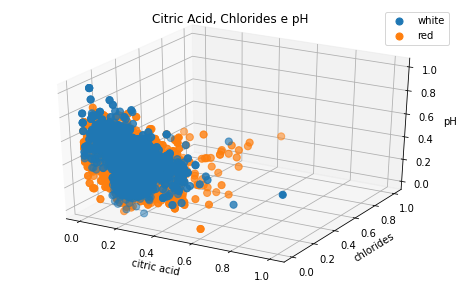

In [91]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(white['citric acid'],white['chlorides'],white['pH'],s=50,label='white')
ax.scatter3D(red['citric acid'],red['chlorides'],red['pH'],s=50,label='red')
plt.legend()
ax.set_xlabel('citric acid')
ax.set_ylabel('chlorides')
ax.set_zlabel('pH')
plt.title('Citric Acid, Chlorides e pH')
plt.show()

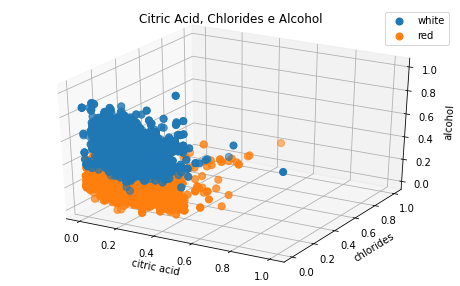

In [92]:
ax = plt.axes(projection='3d')
ax.scatter3D(white['citric acid'],white['chlorides'],white['alcohol'],s=50,label='white')
ax.scatter3D(red['citric acid'],red['chlorides'],red['alcohol'],s=50,label='red')
plt.legend()
ax.set_xlabel('citric acid')
ax.set_ylabel('chlorides')
ax.set_zlabel('alcohol')
plt.title('Citric Acid, Chlorides e Alcohol')
plt.show()

In [93]:
plt.rcParams["figure.figsize"] = (25,20)

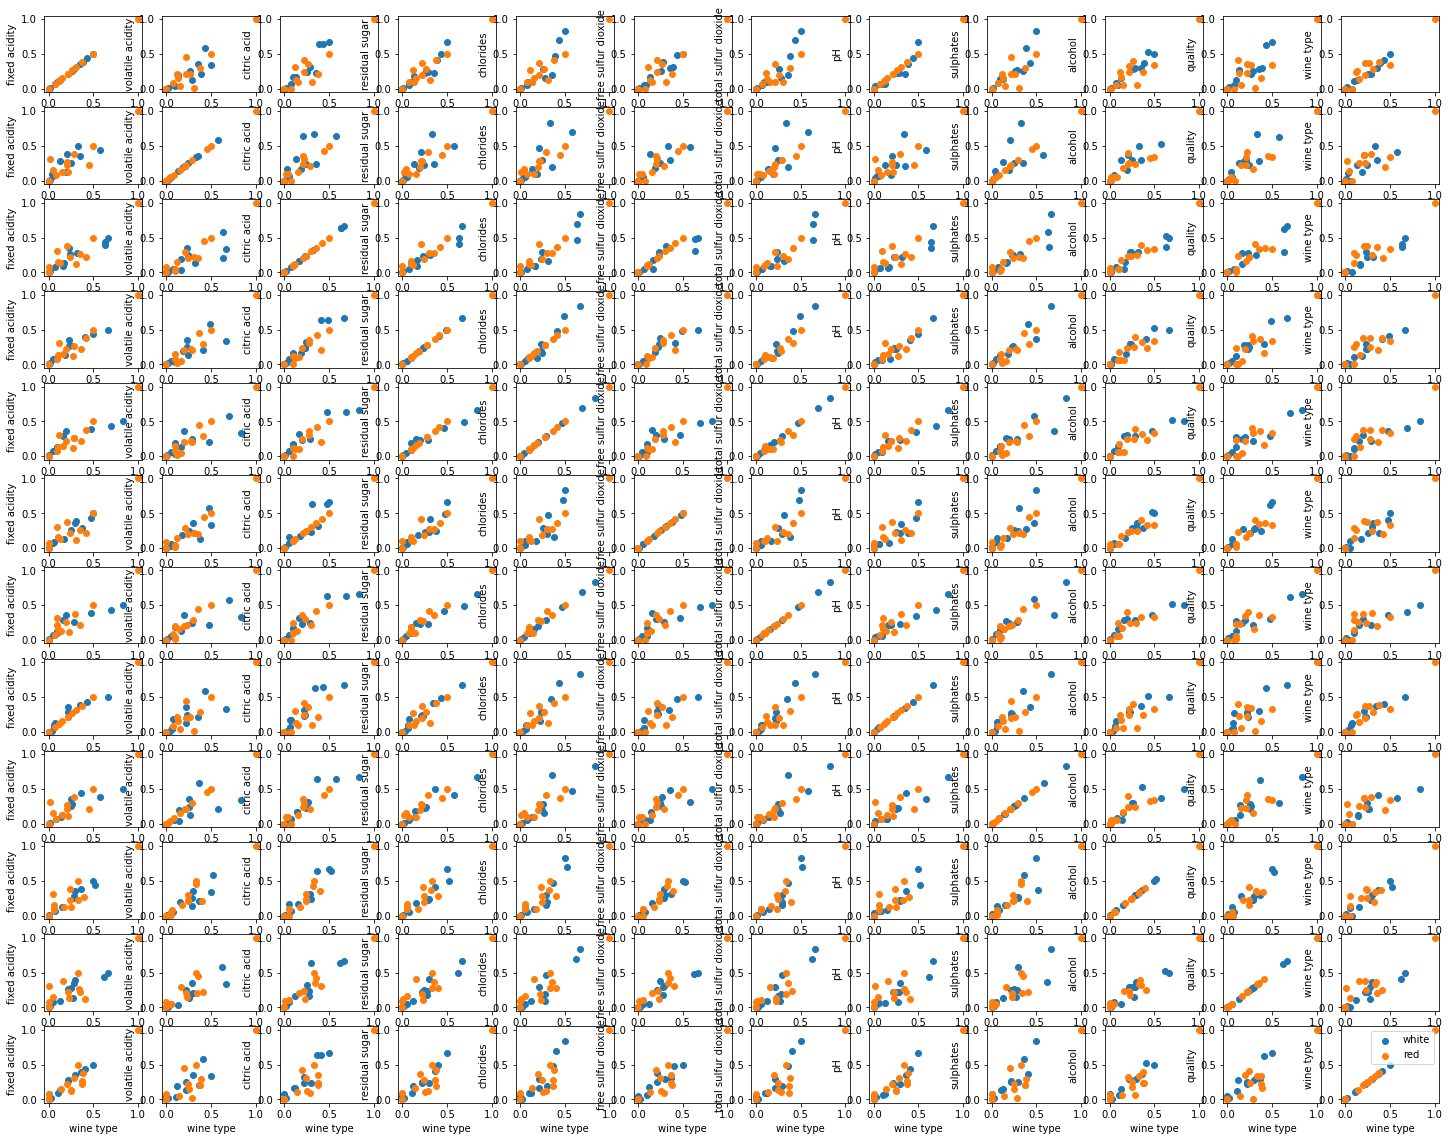

In [94]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(12,12)
for i in range(12):
  for j in range(12):
    axs[i,j].scatter(white.iloc[i],white.iloc[j],label='white')
    axs[i,j].scatter(red.iloc[i],red.iloc[j],label='red')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

***Comentários***

**No tópico 6 acima, que foi trabalhado o modelo do algoritmo K-means, observa-se:** 
* (gráfico 3D) os atributos "Citric Acid", "Chlorides" e "pH" quando comparados, resulta em muita intersecção, indicando muita similaridade entre os seus dados;
* (gráfico 3D) os atributos "Citric Acid", "Chlorides" e "Alcohol" encontra-se, com mais clareza a formação da divisão entre os 2 grupos modelados;
* (gráfico 2D) mesmo ampliando para todos os atributos (12) majoritariamente há intersecção entre os mesmos, não sendo possível destacar grupos heterogêneos.

# **7. Avaliação do modelo**

* Existem duas formas de avaliar o modelo
  * quando as labels(rótulos) estão disponíveis
  * quando as labels não estão disponíveis (mundo real)
* Quando as labels estão disponíveis
  * usamos métricas que comparam labels com os grupos formados
  * um bom modelo agrupa instâncias de mesma classe
* Quando as labels não estão disponíveis
  * usamos métodos que medem a similaridade intra-grupo e dissimilaridade entre instâncias de grupos diferentes


### Métricas para quando se conhecem as classes

#### Acurácia
* similar a métrica de classificação
* não muito utilizada na prática
* os grupos formados não são necessariamente correspondentes as classes

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.439

#### Índice Rand Ajustado
* Mede a similaridade de duas atribuições, ignorando permutações
  * ignora se as classes são 0,1,2 e 2,1,0, por exemplo
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando negativo ou próximo de 0

In [97]:
from sklearn.metrics import adjusted_rand_score

In [98]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.0009660985134273323

### Scores baseados em informação mútua
* Mede a concordância entre duas atribuções, ignorando permutações
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando negativo ou próximo de 0

In [99]:
from sklearn.metrics import adjusted_mutual_info_score

In [100]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-8.794460432495387e-05

### Fowlkes-Mallows scores
* Calculado como a média geométrica de precisão e recall
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando próximo de 0

In [101]:
from sklearn.metrics import fowlkes_mallows_score

In [102]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5962948175304006

## Métricas quando as classes não são conhecidas

### Índice Davies-Boldin
* Índice indica uma smiliaridade média entre os grupos
* Essa similaridade é a comparação da distância entre os grupos levando em consideração o tamanho dos grupos
* Quanto maior o valor, melhor
* 0 é o pior resultado

In [103]:
#excluindo a coluna wine type
X = X.drop(columns=['wine type'])

In [104]:
from sklearn.metrics import davies_bouldin_score

In [105]:
db = davies_bouldin_score(X,kmeans_labels)
db

1.8917881869829336

### Coeficiente de Silhueta
* Considera:
  * a distância média entre uma instância e todas as instâncias no mesmo grupo
  * a distância média entre uma instância e todas as instâncias no grupo mais próximo
* Quanto maior o valor, melhor
* 0 é o pior resultado

In [106]:
from sklearn.metrics import silhouette_score

In [107]:
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.18754736995215468

### Índice Calinski-Harabasz 
* Também conhecido como critério da taxa de variância
* Mede a dispersão entre grupos e intra-grupos para todos os grupos
  * a dispersão é a soma das distâncias quadradas
* Quanto maior o valor, melhor

In [108]:
from sklearn.metrics import calinski_harabasz_score

In [109]:
ch = calinski_harabasz_score(X,kmeans_labels)
ch

1843.2465618195613

## **Agrupamento Hierárquico**

### Agrupamento Hierárquico Aglomerativo
* Cria-se os grupos a partir das folhas
* Cada grupo inicialmente contem uma instância

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png width=220>

* A cada iteração, grupos menores que estão mais próximos são agrupados até que haja apenas um grupo

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-31-06.png width=300>

* Cada iteração representa a criação de um novo nível hierárquico

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-10-06.png width=300>

* Em seguida, podemos definir um limiar de distância de desenhar uma linha horizontal no dendograma
  * o número de linhas verticais que o limiar cortar, será o número de grupos utilizados

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-12-55.png width=300>

In [110]:
from sklearn.cluster import AgglomerativeClustering

### Definindo modelo e realizando o agrupamento

In [120]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [121]:
labels_hierarquico

array([1, 1, 0, ..., 0, 0, 0])

## Avaliando o modelo

In [122]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.52

In [123]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

-0.048396426195490866

In [124]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.06109923677417999

In [125]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.6025804407528794

In [126]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.9573465031708608

In [127]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.12946552992762647

In [128]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

1383.504999245691

**Comentários**

*Observou-se no tópico 7 acima:*

** No tocante ao K-means:**
* Nas métricas que se sabem o rótulo(classe), foi muito abaixo, mesmo rodando novamente, por exemplo, uma execução na acurácia foi 44%, já em outra rodada contabilizou 56% - distiguindo entre a taxa de erro/acerto, já na métrica Fowlkes Mallows (que notabilizou como a melhor performance) contabilizou 59%, as demais, 2 foram taxas negativas.

* Nas métricas que não se sabe o rótulo(classe), o índice Davies-Boldin superou 1.80 (Porque foi tão alto? Foi pela consideração do tamanho dos grupos?), quanto ao índice Calinski-Harabasz ficou em mais de 1843, mostrando que o grupo varia muito sendo portanto muito disperso.


** No tocante ao Agrupamento Hierárquico:**
* Não entendi por que não é feito o predict? Ele já é inserido no Fit?
* Novamente o índice que se saiu melhor foi o Fowlkes Mallows com 60%, sendo seguido pela acurácia 52%, embora no geral tenha sido novamente muito baixa em todas as métricas, no índice Calinski-Harabasz novamente foi alto, ratificando a alta variância.

** Portanto, constata-se que no geral o modelo de agrupamento hierárquico se saiu com melhor resultado em comparação com o modelo K-means para este dataset trabalhado. 
